In [16]:
import numpy as np
import pandas as pd

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [18]:
data = pd.read_csv('/Users/ttesileanu/Dropbox/OlfactoryReceptorDistribution/code/' + 
                   'ibarra_soria/intermittent_exposure_results.csv', thousands=',')

In [19]:
data_control = data[['control' + str(_ + 1) for _ in xrange(6)]].copy(deep=True)
data_exposed = data[['exposed' + str(_ + 1) for _ in xrange(6)]].copy(deep=True)

In [20]:
# normalize the data
total = np.mean(data_control.sum(axis=0))
for col_name in data_control.columns:
    data_control.loc[:, col_name] = data_control[col_name] / data_control[col_name].sum() * total
for col_name in data_exposed.columns:
    data_exposed.loc[:, col_name] = data_exposed[col_name] / data_exposed[col_name].sum() * total

In [21]:
eps = np.spacing(1.0)

data_control_mean = data_control.mean(axis=1)
#data_control_mean = data_control.median(axis=1)
data_control_std = data_control.std(axis=1)/np.sqrt(6) # sem
data_control_std_rel = data_control_std / (data_control_mean + eps)

data_exposed_mean = data_exposed.mean(axis=1)
#data_exposed_mean = data_exposed.median(axis=1)
data_exposed_std = data_exposed.std(axis=1)/np.sqrt(6) # sem
data_exposed_std_rel = data_exposed_std / (data_exposed_mean + eps)

In [22]:
fold_change = (data_exposed_mean + eps) / (data_control_mean + eps)
fold_change_std_rel = data_control_std_rel + data_exposed_std_rel
fold_change_std = fold_change*fold_change_std_rel

log_fold_change = np.log2(fold_change)
log_fold_change_std = fold_change_std_rel

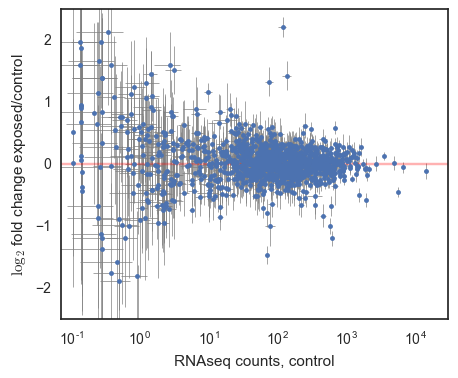

In [29]:
plt.figure(figsize=(5, 4))

plt.axhline(0, color='r', alpha=0.3)
plt.errorbar(data_control_mean, log_fold_change, xerr=data_control_std, yerr=fold_change_std_rel,
             fmt='none', ecolor=[0.5, 0.5, 0.5], elinewidth=0.5)
plt.semilogx(data_control_mean, log_fold_change, '.')
plt.xlim(0.07, 3e4)
plt.ylim(-2.5, 2.5);

plt.xlabel('RNAseq counts, control')
plt.ylabel('$\log_2$ fold change exposed/control')

plt.savefig('ibarra_soria_Fig5B_remake.pdf')

#plt.semilogx(data_control_mean[442], log_fold_change[442], '.', color='r');